# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [163]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

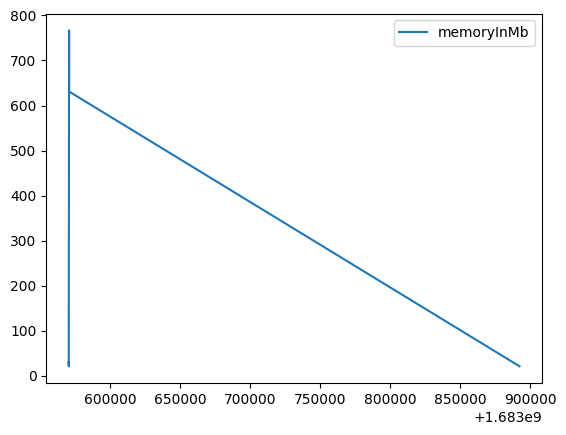

In [164]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

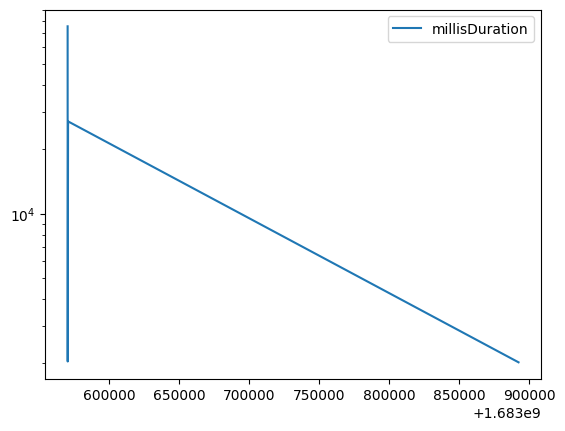

In [165]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [166]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

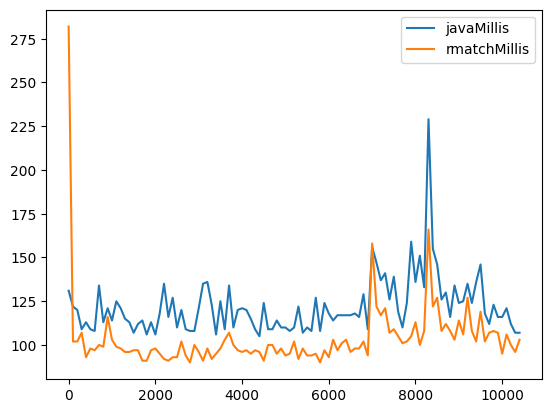

In [167]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

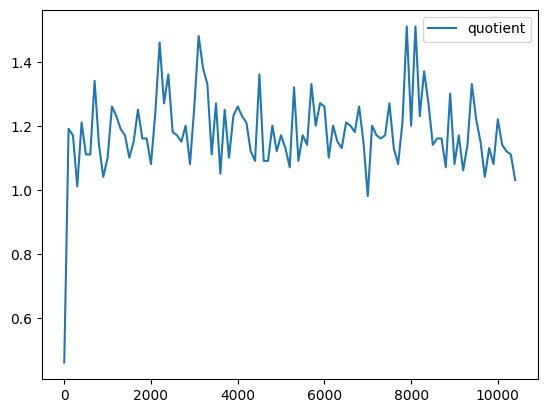

In [168]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [169]:
df[" quotient"].std()

0.12511474586834134

In [170]:
df[" quotient"].mean()

1.181047619047619

In [171]:
df[" javaMillis"].std()

16.22013739593032

In [172]:
df[" javaMillis"].mean()

121.65714285714286

In [173]:
df[" regexMillis"].std()

21.037869221761536

In [174]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [175]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [176]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1685301211425,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1318,226606,java,533,19769,1144409,8,19566,1154369,11.462694
57,1685301461093,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,753,229868,java,536,15268,1144409,8,19566,1154369,15.055541
58,1685301742719,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2390,265588,java,535,12459,1144409,8,19566,1154369,21.316960
59,1685301911122,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1182,153662,java,535,11638,1144409,8,19566,1154369,13.203471


In [177]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [178]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1685301211425,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1318,226606,java,533,19769,1144409,8,19566,1154369,11.462694,9.967249e+04,1.142515e+06,11.462694
57,1685301461093,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,753,229868,java,536,15268,1144409,8,19566,1154369,15.055541,9.825806e+04,1.479328e+06,15.055541
58,1685301742719,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2390,265588,java,535,12459,1144409,8,19566,1154369,21.316960,8.504294e+04,1.812857e+06,21.316960
59,1685301911122,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1182,153662,java,535,11638,1144409,8,19566,1154369,13.203471,1.469874e+05,1.940744e+06,13.203471


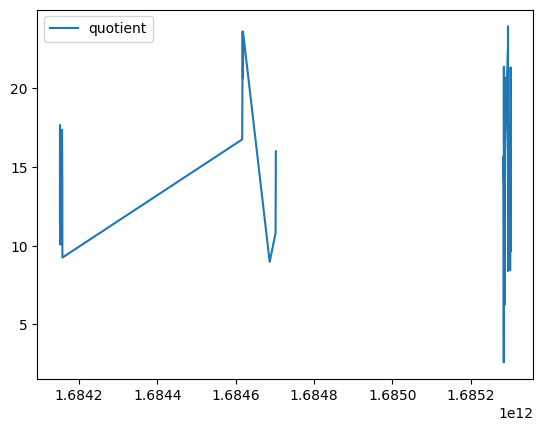

In [179]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

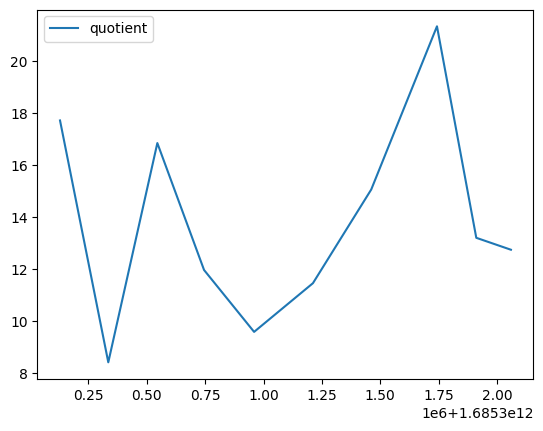

In [180]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [181]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
51,1685300128023,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2077,177211,java,538,10009,1144409,8,19566,1154369,17.705166,127454.750856,2.256607e+06,17.705165
52,1685300334806,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1651,179213,java,536,21266,1144409,8,19566,1154369,8.427208,126030.945601,1.062089e+06,8.427208
53,1685300544939,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1348,193100,java,533,11468,1144409,8,19566,1154369,16.838158,116967.290803,1.969514e+06,16.838158
54,1685300744994,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1011,180571,java,538,15087,1144409,8,19566,1154369,11.968649,125083.118851,1.497076e+06,11.968649
55,1685300959367,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1982,189003,java,534,19699,1144409,8,19566,1154369,9.594548,119502.779607,1.146575e+06,9.594548
56,1685301211425,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1318,226606,java,533,19769,1144409,8,19566,1154369,11.462694,99672.488169,1.142515e+06,11.462694
57,1685301461093,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,753,229868,java,536,15268,1144409,8,19566,1154369,15.055541,98258.060513,1.479328e+06,15.055541
58,1685301742719,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2390,265588,java,535,12459,1144409,8,19566,1154369,21.316960,85042.938137,1.812857e+06,21.316960
59,1685301911122,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1182,153662,java,535,11638,1144409,8,19566,1154369,13.203471,146987.439016,1.940744e+06,13.203471
60,1685302059498,A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2119,134888,java,534,10583,1144409,8,19566,1154369,12.745725,167445.464786,2.134214e+06,12.745724


In [182]:
import sqlite3

In [183]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


        timestamp                          testSeriesId   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   
..            ...                                   ...   
56  1685301211425  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
57  1685301461093  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
58  1685301742719  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
59  1685301911122  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
60  1685302059498  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   

                              metadata matcherTypeName1  usedMemoryInMb1   
0                               master           rmatch              917  \
1                               master           rmatch              599   
2                               master           rmatch        

In [184]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [185]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [186]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [189]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

        timestamp                          testSeriesId   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   
..            ...                                   ...   
56  1685301211425  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
57  1685301461093  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
58  1685301742719  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
59  1685301911122  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   
60  1685302059498  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   

                              metadata matcherTypeName1  usedMemoryInMb1   
0                               master           rmatch              917  \
1                               master           rmatch              599   
2                               master           rmatch        

In [0]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [191]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis1) as 'minJavaDuration',\n       max(durationInMillis1) as 'maxJavaDuration',\n       avg(durationInMillis1) as 'avgJavaDuration',\n       min(durationInMillis2) as 'minRegexDuration',\n       max(durationInMillis2) as 'maxRegexDuration',\n       avg(durationInMillis2) as 'avgRegexuration',\n--       stdev(durationInMillis1) as 'stdevJavaDuration',\n--       stdev(durationInMillis2) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMillis2))) as 'stdevStdevRatio'\nfrom Measurements  where timestamp >= 16852

In [192]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


       timestamp                          testSeriesId   
0  1685294890722  9944A73D-6097-402F-BF49-9105CBF968A8  \
1  1685294914249  509618D3-F94B-408F-AC94-CC26EA98DE4C   
2  1685294953205  8134D22C-6402-4AAC-A082-199CA4BCF01E   
3  1685295100391  6DE05017-510E-496A-BE45-2778F03E0D4F   
4  1685300128023  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD   

                             metadata  noOfMatches  noOfMismatches   
0  u/la3lma/refactoring-a-la-chatgpt2           23               0  \
1  u/la3lma/refactoring-a-la-chatgpt2         6467               0   
2  u/la3lma/refactoring-a-la-chatgpt2        96068               0   
3  u/la3lma/refactoring-a-la-chatgpt2       576005               0   
4  u/la3lma/refactoring-a-la-chatgpt2      1144409               8   

   corpusLength  noOfRegexps  minJavaDuration  maxJavaDuration   
0       1154369            9             1500             1645  \
1       1154369           99             1946             2677   
2       1154369          999    

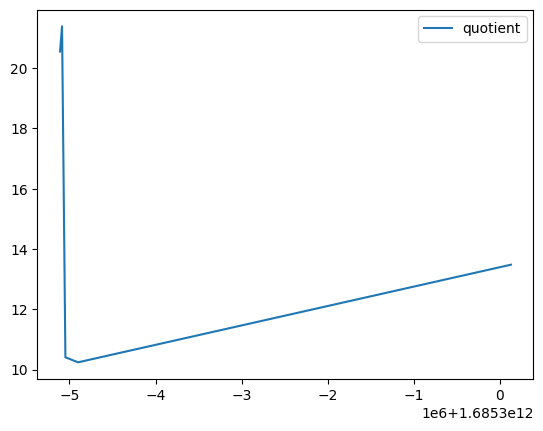

In [194]:
lastTen = r_df.iloc[-10:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()